In [1]:
import pandas as pd

In [2]:
mvps = pd.read_csv("mvps.csv")

In [3]:
mvps

,Unnamed: 0,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,0,1,Michael Jordan,28,CHI,80.0,900.0,960,0.938,80,...,6.4,6.1,2.3,0.9,0.519,0.270,0.832,17.7,0.274,1992
1,1,2,Clyde Drexler,29,POR,12.0,561.0,960,0.584,76,...,6.6,6.7,1.8,0.9,0.470,0.337,0.794,12.8,0.223,1992
2,2,3,David Robinson,26,SAS,2.0,337.0,960,0.351,68,...,12.2,2.7,2.3,4.5,0.551,0.125,0.701,13.9,0.260,1992
3,3,4,Karl Malone,28,UTA,1.0,262.0,960,0.273,81,...,11.2,3.0,1.3,0.6,0.526,0.176,0.778,15.1,0.237,1992
4,4,5,Patrick Ewing,29,NYK,0.0,100.0,960,0.104,82,...,11.2,1.9,1.1,3.0,0.522,0.167,0.738,13.0,0.198,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449,10,11,Russell Westbrook,32,WAS,0.0,5.0,1010,0.005,65,...,11.5,11.7,1.4,0.4,0.439,0.315,0.656,3.7,0.075,2021
450,11,12,Ben Simmons,24,PHI,0.0,3.0,1010,0.003,58,...,7.2,6.9,1.6,0.6,0.557,0.300,0.613,6.0,0.153,2021
451,12,13T,James Harden,31,TOT,0.0,1.0,1010,0.001,44,...,7.9,10.8,1.2,0.8,0.466,0.362,0.861,7.0,0.208,2021
452,13,13T,LeBron James,36,LAL,0.0,1.0,1010,0.001,45,...,7.7,7.8,1.1,0.6,0.513,0.365,0.698,5.6,0.179,2021


Correcting the names of players in "mvps" so no data is left out durring merge

In [4]:
mvps['Player'] = mvps['Player'].str.replace('Peja Stojakovi', 'Peja Stojaković', regex=False)
mvps['Player'] = mvps['Player'].str.replace('Luka Doni', 'Luka Dončić', regex=False)
mvps['Player'] = mvps['Player'].str.replace('Manu Ginbili', 'Manu Ginóbili', regex=False)
mvps['Player'] = mvps['Player'].str.replace('Goran Dragi', 'Goran Dragić', regex=False)
mvps['Player'] = mvps['Player'].str.replace('Nikola Joki', 'Nikola Jokić', regex=False)

Double checking that the names were corrected by placing the corrected name in the function below

In [5]:
mvps[mvps["Player"] == "Nikola Jokić"]

,Unnamed: 0,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
418,3,4,Nikola Jokić,23,DEN,0.0,212.0,1010,0.210,80,...,10.8,7.3,1.4,0.7,0.511,0.307,0.821,11.8,0.226,2019
435,8,9,Nikola Jokić,24,DEN,0.0,18.0,1010,0.018,73,...,9.7,7.0,1.2,0.6,0.528,0.314,0.817,9.8,0.202,2020
439,0,1,Nikola Jokić,25,DEN,91.0,971.0,1010,0.961,72,...,10.8,8.3,1.3,0.7,0.566,0.388,0.868,15.6,0.301,2021


In [6]:
mvps = mvps[["Player", "Year", "Pts Won", "Pts Max", "Share"]]
mvps.head()

,Player,Year,Pts Won,Pts Max,Share
0,Michael Jordan,1992,900.0,960,0.938
1,Clyde Drexler,1992,561.0,960,0.584
2,David Robinson,1992,337.0,960,0.351
3,Karl Malone,1992,262.0,960,0.273
4,Patrick Ewing,1992,100.0,960,0.104


In [7]:
players = pd.read_csv("players.csv")
players

,Unnamed: 0,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,0,1,Alaa Abdelnaby,PF,23,POR,71,1,13.2,2.5,...,1.1,2.5,3.7,0.4,0.4,0.2,0.9,1.9,6.1,1992
1,1,2,Mahmoud Abdul-Rauf,PG,22,DEN,81,11,19.0,4.4,...,0.3,1.1,1.4,2.4,0.5,0.0,1.4,1.6,10.3,1992
2,2,3,Mark Acres,C,29,ORL,68,6,13.6,1.1,...,1.4,2.3,3.7,0.3,0.4,0.2,0.5,2.1,3.1,1992
3,3,4,Michael Adams,PG,29,WSB,78,78,35.8,6.2,...,0.7,3.2,4.0,7.6,1.9,0.1,2.7,2.1,18.1,1992
4,4,5,Rafael Addison,SF,27,NJN,76,8,15.5,2.5,...,0.9,1.3,2.2,0.9,0.4,0.4,0.6,1.4,5.8,1992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17580,725,536,Delon Wright,PG,28,SAC,27,8,25.8,3.9,...,1.0,2.9,3.9,3.6,1.6,0.4,1.3,1.1,10.0,2021
17581,726,537,Thaddeus Young,PF,32,CHI,68,23,24.3,5.4,...,2.5,3.8,6.2,4.3,1.1,0.6,2.0,2.2,12.1,2021
17582,727,538,Trae Young,PG,22,ATL,63,63,33.7,7.7,...,0.6,3.3,3.9,9.4,0.8,0.2,4.1,1.8,25.3,2021
17583,728,539,Cody Zeller,C,28,CHO,48,21,20.9,3.8,...,2.5,4.4,6.8,1.8,0.6,0.4,1.1,2.5,9.4,2021


In [8]:
del players["Unnamed: 0"]

In [9]:
del players["Rk"]

In [10]:
players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Alaa Abdelnaby,PF,23,POR,71,1,13.2,2.5,5.1,.493,...,1.1,2.5,3.7,0.4,0.4,0.2,0.9,1.9,6.1,1992
1,Mahmoud Abdul-Rauf,PG,22,DEN,81,11,19.0,4.4,10.4,.421,...,0.3,1.1,1.4,2.4,0.5,0.0,1.4,1.6,10.3,1992
2,Mark Acres,C,29,ORL,68,6,13.6,1.1,2.2,.517,...,1.4,2.3,3.7,0.3,0.4,0.2,0.5,2.1,3.1,1992
3,Michael Adams,PG,29,WSB,78,78,35.8,6.2,15.8,.393,...,0.7,3.2,4.0,7.6,1.9,0.1,2.7,2.1,18.1,1992
4,Rafael Addison,SF,27,NJN,76,8,15.5,2.5,5.7,.433,...,0.9,1.3,2.2,0.9,0.4,0.4,0.6,1.4,5.8,1992


In [11]:

players.isna().sum()


Player       0
Pos          0
Age          0
Tm           0
G            0
GS           0
MP           0
FG           0
FGA          0
FG%         90
3P           0
3PA          0
3P%       2710
2P           0
2PA          0
2P%        147
eFG%        90
FT           0
FTA          0
FT%        786
ORB          0
DRB          0
TRB          0
AST          0
STL          0
BLK          0
TOV          0
PF           0
PTS          0
Year         0
dtype: int64

In [12]:
players["Player"] = players["Player"].str.replace("*", "", regex= False)
players.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,Alaa Abdelnaby,PF,23,POR,71,1,13.2,2.5,5.1,.493,...,1.1,2.5,3.7,0.4,0.4,0.2,0.9,1.9,6.1,1992
1,Mahmoud Abdul-Rauf,PG,22,DEN,81,11,19.0,4.4,10.4,.421,...,0.3,1.1,1.4,2.4,0.5,0.0,1.4,1.6,10.3,1992
2,Mark Acres,C,29,ORL,68,6,13.6,1.1,2.2,.517,...,1.4,2.3,3.7,0.3,0.4,0.2,0.5,2.1,3.1,1992
3,Michael Adams,PG,29,WSB,78,78,35.8,6.2,15.8,.393,...,0.7,3.2,4.0,7.6,1.9,0.1,2.7,2.1,18.1,1992
4,Rafael Addison,SF,27,NJN,76,8,15.5,2.5,5.7,.433,...,0.9,1.3,2.2,0.9,0.4,0.4,0.6,1.4,5.8,1992


In [13]:
def single_row(df):
    if df.shape[0] == 1:
        return df
    else:
        row = df[df["Tm"] == "TOT"]
        row["Tm"] = df.iloc[-1,:]["Tm"]
        return row
        
players = players.groupby(["Player", "Year"]).apply(single_row)


In [14]:
players

Player Pos Age   Tm   G  GS    MP   FG  \
Player         Year                                                        
A.C. Green     1992 174       A.C. Green  PF  28  LAL  82  53  35.4  4.7   
               1993 633       A.C. Green  PF  29  LAL  82  55  34.4  4.6   
               1994 1120      A.C. Green  PF  30  PHO  82  55  34.5  5.7   
               1995 1608      A.C. Green  SF  31  PHO  82  52  32.8  3.8   
               1996 2104      A.C. Green  SF  32  PHO  82  36  25.8  2.6   
...                                  ...  ..  ..  ...  ..  ..   ...  ...   
Željko Rebrača 2002 5636  Željko Rebrača   C  29  DET  74   4  15.9  2.6   
               2003 6136  Željko Rebrača   C  30  DET  30  12  16.3  2.7   
               2004 6717  Željko Rebrača   C  31  ATL  24   2  11.4  1.4   
               2005 7317  Željko Rebrača   C  32  LAC  58   2  16.0  2.3   
               2006 7911  Željko Rebrača   C  33  LAC  29   2  14.2  1.8   

                           FGA   FG%  ...  ORB  DRB  TRB  AST  STL  BLK  TOV  \
Player         Year                   ...                                      
A.C. Green     1992 174    9.8  .476  ...  3.7  5.6  9.3  1.4  1.1  0.4  1.4   
               1993 633    8.6  .537  ...  3.5  5.2  8.7  1.4  1.1  0.5  1.4   
               1994 1120  11.3  .502  ...  3.4  5.8  9.2  1.7  0.9  0.5  1.2   
               1995 1608   7.5  .504  ...  2.4  5.8  8.2  1.5  0.7  0.4  1.4   
               1996 2104   5.4  .484  ...  2.0  4.7  6.8  0.9  0.5  0.3  1.0   
...                        ...   ...  ...  ...  ...  ...  ...  ...  ...  ...   
Željko Rebrača 2002 5636   5.1  .505  ...  1.1  2.8  3.9  0.5  0.4  1.0  1.1   
               2003 6136   4.8  .552  ...  0.9  2.2  3.1  0.3  0.2  0.6  1.0   
               2004 6717   3.2  .442  ...  1.0  1.5  2.4  0.3  0.2  0.5  0.7   
               2005 7317   4.0  .568  ...  0.8  2.3  3.2  0.4  0.2  0.7  0.8   
               2006 7911   3.3  .542  ...  0.4  1.8  2.2  0.3  0.2  0.7  0.8   

                           PF   PTS  Year  
Player         Year                        
A.C. Green     1992 174   1.7  13.6  1992  
               1993 633   1.8  12.8  1993  
               1994 1120  1.7  14.7  1994  
               1995 1608  1.8  11.2  1995  
               1996 2104  1.7   7.5  1996  
...                       ...   ...   ...  
Željko Rebrača 2002 5636  2.6   6.9  2002  
               2003 6136  2.6   6.6  2003  
               2004 6717  2.2   3.8  2004  
               2005 7317  2.2   5.8  2005  
               2006 7911  2.0   4.7  2006  

[13707 rows x 30 columns]

In [15]:
players.index = players.index.droplevel()

In [16]:
players.index = players.index.droplevel()

In [17]:
players

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
174,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,3.7,5.6,9.3,1.4,1.1,0.4,1.4,1.7,13.6,1992
633,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,3.5,5.2,8.7,1.4,1.1,0.5,1.4,1.8,12.8,1993
1120,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,3.4,5.8,9.2,1.7,0.9,0.5,1.2,1.7,14.7,1994
1608,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,2.4,5.8,8.2,1.5,0.7,0.4,1.4,1.8,11.2,1995
2104,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,2.0,4.7,6.8,0.9,0.5,0.3,1.0,1.7,7.5,1996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5636,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,1.1,2.8,3.9,0.5,0.4,1.0,1.1,2.6,6.9,2002
6136,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.9,2.2,3.1,0.3,0.2,0.6,1.0,2.6,6.6,2003
6717,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,1.0,1.5,2.4,0.3,0.2,0.5,0.7,2.2,3.8,2004
7317,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.8,2.3,3.2,0.4,0.2,0.7,0.8,2.2,5.8,2005


In [18]:
combined = players.merge(mvps, how="outer", on=["Player", "Year"])

In [19]:
combined[combined["Pts Won"] > 0]

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
182,Al Jefferson,C,29,CHA,73,73,35.0,9.6,18.8,.509,...,2.1,0.9,1.1,1.7,2.4,21.8,2014,34.0,1250.0,0.027
320,Allen Iverson,PG,21,PHI,76,74,40.1,8.2,19.8,.416,...,7.5,2.1,0.3,4.4,3.1,23.5,1997,1.0,1150.0,0.001
322,Allen Iverson,SG,23,PHI,48,48,41.5,9.1,22.0,.412,...,4.6,2.3,0.1,3.5,2.0,26.8,1999,319.0,1180.0,0.270
323,Allen Iverson,SG,24,PHI,70,70,40.8,10.4,24.8,.421,...,4.7,2.1,0.1,3.3,2.3,28.4,2000,132.0,1210.0,0.109
324,Allen Iverson,SG,25,PHI,71,71,42.0,10.7,25.5,.420,...,4.6,2.5,0.3,3.3,2.1,31.1,2001,1121.0,1240.0,0.904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13217,Vince Carter,SF,23,TOR,82,82,38.1,9.6,20.7,.465,...,3.9,1.3,1.1,2.2,3.2,25.7,2000,51.0,1210.0,0.042
13218,Vince Carter,SF,24,TOR,75,75,39.7,10.2,22.1,.460,...,3.9,1.5,1.1,2.2,2.7,27.6,2001,7.0,1240.0,0.006
13222,Vince Carter,SF-SG,28,NJN,77,76,36.7,9.0,20.0,.452,...,4.2,1.4,0.6,2.2,3.2,24.5,2005,3.0,1270.0,0.002
13568,Yao Ming,C,23,HOU,82,82,32.8,6.5,12.5,.522,...,1.5,0.3,1.9,2.5,3.3,17.5,2004,1.0,1230.0,0.001


In [20]:
combined

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,NaN,NaN,NaN
1,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,NaN,NaN,NaN
2,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,NaN,NaN,NaN
3,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,NaN,NaN,NaN
4,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,0.9,0.5,0.3,1.0,1.7,7.5,1996,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13702,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,0.5,0.4,1.0,1.1,2.6,6.9,2002,NaN,NaN,NaN
13703,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.3,0.2,0.6,1.0,2.6,6.6,2003,NaN,NaN,NaN
13704,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,0.3,0.2,0.5,0.7,2.2,3.8,2004,NaN,NaN,NaN
13705,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.4,0.2,0.7,0.8,2.2,5.8,2005,NaN,NaN,NaN


In [21]:
combined[["Pts Won", "Pts Max", "Share"]] = combined[["Pts Won", "Pts Max", "Share"]].fillna(0)

In [22]:
combined

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,AST,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share
0,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,1.4,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0
1,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,1.4,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0
2,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,1.7,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0
3,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,1.5,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0
4,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,0.9,0.5,0.3,1.0,1.7,7.5,1996,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13702,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,0.5,0.4,1.0,1.1,2.6,6.9,2002,0.0,0.0,0.0
13703,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.3,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.0
13704,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,0.3,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.0
13705,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.4,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.0


In [23]:
teams = pd.read_csv("teams.csv")

In [24]:
teams.drop("Unnamed: 0", axis=1, inplace=True)

In [25]:
teams.head()

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,51,31,.622,—,106.6,103.0,3.41,1992,Boston Celtics*
1,51,31,.622,—,101.6,97.7,3.67,1992,New York Knicks*
2,40,42,.488,11.0,105.4,107.1,-1.54,1992,New Jersey Nets*
3,38,44,.463,13.0,105.0,109.2,-3.94,1992,Miami Heat*
4,35,47,.427,16.0,101.9,103.2,-1.34,1992,Philadelphia 76ers


In [26]:
teams = teams[~teams["W"].str.contains("Division")].copy()

In [27]:
teams.head(4)

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,51,31,.622,—,106.6,103.0,3.41,1992,Boston Celtics*
1,51,31,.622,—,101.6,97.7,3.67,1992,New York Knicks*
2,40,42,.488,11.0,105.4,107.1,-1.54,1992,New Jersey Nets*
3,38,44,.463,13.0,105.0,109.2,-3.94,1992,Miami Heat*


In [28]:
teams["Team"] = teams["Team"].str.replace("*", "", regex=False)

In [29]:
teams.head(5)

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,51,31,.622,—,106.6,103.0,3.41,1992,Boston Celtics
1,51,31,.622,—,101.6,97.7,3.67,1992,New York Knicks
2,40,42,.488,11.0,105.4,107.1,-1.54,1992,New Jersey Nets
3,38,44,.463,13.0,105.0,109.2,-3.94,1992,Miami Heat
4,35,47,.427,16.0,101.9,103.2,-1.34,1992,Philadelphia 76ers


In [30]:
sorted(teams["Team"].unique())

['Atlanta Hawks',
 'Boston Celtics',
 'Brooklyn Nets',
 'Charlotte Bobcats',
 'Charlotte Hornets',
 'Chicago Bulls',
 'Cleveland Cavaliers',
 'Dallas Mavericks',
 'Denver Nuggets',
 'Detroit Pistons',
 'Golden State Warriors',
 'Houston Rockets',
 'Indiana Pacers',
 'Los Angeles Clippers',
 'Los Angeles Lakers',
 'Memphis Grizzlies',
 'Miami Heat',
 'Milwaukee Bucks',
 'Minnesota Timberwolves',
 'New Jersey Nets',
 'New Orleans Hornets',
 'New Orleans Pelicans',
 'New Orleans/Oklahoma City Hornets',
 'New York Knicks',
 'Oklahoma City Thunder',
 'Orlando Magic',
 'Philadelphia 76ers',
 'Phoenix Suns',
 'Portland Trail Blazers',
 'Sacramento Kings',
 'San Antonio Spurs',
 'Seattle SuperSonics',
 'Toronto Raptors',
 'Utah Jazz',
 'Vancouver Grizzlies',
 'Washington Bullets',
 'Washington Wizards']

In [31]:
sorted(combined["Tm"].unique())

['ATL',
 'BOS',
 'BRK',
 'CHA',
 'CHH',
 'CHI',
 'CHO',
 'CLE',
 'DAL',
 'DEN',
 'DET',
 'GSW',
 'HOU',
 'IND',
 'LAC',
 'LAL',
 'MEM',
 'MIA',
 'MIL',
 'MIN',
 'NJN',
 'NOH',
 'NOK',
 'NOP',
 'NYK',
 'OKC',
 'ORL',
 'PHI',
 'PHO',
 'POR',
 'SAC',
 'SAS',
 'SEA',
 'TOR',
 'UTA',
 'VAN',
 'WAS',
 'WSB']

In [32]:
sorted_list = sorted([str(x) for x in combined["Tm"].unique()])



In [33]:
sorted_list

['ATL',
 'BOS',
 'BRK',
 'CHA',
 'CHH',
 'CHI',
 'CHO',
 'CLE',
 'DAL',
 'DEN',
 'DET',
 'GSW',
 'HOU',
 'IND',
 'LAC',
 'LAL',
 'MEM',
 'MIA',
 'MIL',
 'MIN',
 'NJN',
 'NOH',
 'NOK',
 'NOP',
 'NYK',
 'OKC',
 'ORL',
 'PHI',
 'PHO',
 'POR',
 'SAC',
 'SAS',
 'SEA',
 'TOR',
 'UTA',
 'VAN',
 'WAS',
 'WSB']

Converted nicknames.txt to csv after downloading text file

In [34]:
nicknames = pd.read_csv("C:\\Users\\ljjx\\Desktop\\PandasProject\\nicknames.csv")

In [35]:
nicknames

,Abbreviation,Name
0,ATL,Atlanta Hawks
1,BRK,Brooklyn Nets
2,BKN,Brooklyn Nets
3,BOS,Boston Celtics
4,CHA,Charlotte Bobcats
5,CHH,Charlotte Hornets
6,CHO,Charlotte Hornets
7,CHI,Chicago Bulls
8,CLE,Cleveland Cavaliers
9,DAL,Dallas Mavericks


In [36]:
nicknames = {}
with open("nicknames.csv") as f:
    lines = f.readlines()
    for line in lines[1:]:
        abbrev,name = line.replace("\n","").split(",")
        nicknames[abbrev] = name

In [37]:
nicknames

{'ATL': 'Atlanta Hawks',
 'BRK': 'Brooklyn Nets',
 'BKN': 'Brooklyn Nets',
 'BOS': 'Boston Celtics',
 'CHA': 'Charlotte Bobcats',
 'CHH': 'Charlotte Hornets',
 'CHO': 'Charlotte Hornets',
 'CHI': 'Chicago Bulls',
 'CLE': 'Cleveland Cavaliers',
 'DAL': 'Dallas Mavericks',
 'DEN': 'Denver Nuggets',
 'DET': 'Detroit Pistons',
 'GSW': 'Golden State Warriors',
 'HOU': 'Houston Rockets',
 'IND': 'Indiana Pacers',
 'LAC': 'Los Angeles Clippers',
 'LAL': 'Los Angeles Lakers',
 'MEM': 'Memphis Grizzlies',
 'MIA': 'Miami Heat',
 'MIL': 'Milwaukee Bucks',
 'MIN': 'Minnesota Timberwolves',
 'NJN': 'New Jersey Nets',
 'NOH': 'New Orleans Hornets',
 'NOP': 'New Orleans Pelicans',
 'NOK': 'New Orleans/Oklahoma City Hornets',
 'NYK': 'New York Knicks',
 'OKC': 'Oklahoma City Thunder',
 'ORL': 'Orlando Magic',
 'PHI': 'Philadelphia 76ers',
 'PHX': 'Phoenix Suns',
 'PHO': 'Phoenix Suns',
 'POR': 'Portland Trail Blazers',
 'SEA': 'Seattle SuperSonics',
 'SAC': 'Sacramento Kings',
 'SAS': 'San Antonio Spu

Converting "TM" column into full team names

In [38]:
combined["Team"] = combined["Tm"].map(nicknames)

In [39]:
combined.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0,Los Angeles Lakers
1,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0,Los Angeles Lakers
2,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0,Phoenix Suns
3,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0,Phoenix Suns
4,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,0.5,0.3,1.0,1.7,7.5,1996,0.0,0.0,0.0,Phoenix Suns


In [40]:
stats = combined.merge(teams, how= "outer", on= ["Team", "Year"])

In [41]:
stats

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,0.0,0.0,Los Angeles Lakers,43,39,.524,14.0,100.4,101.5,-0.95
1,Byron Scott,SG,30,LAL,82,82,32.7,5.6,12.3,.458,...,0.0,0.0,Los Angeles Lakers,43,39,.524,14.0,100.4,101.5,-0.95
2,Chucky Brown,SF,23,LAL,42,2,10.3,1.4,3.0,.469,...,0.0,0.0,Los Angeles Lakers,43,39,.524,14.0,100.4,101.5,-0.95
3,Cliff Robinson,PF,31,LAL,9,0,8.7,1.2,3.0,.407,...,0.0,0.0,Los Angeles Lakers,43,39,.524,14.0,100.4,101.5,-0.95
4,Demetrius Calip,PG,22,LAL,7,0,8.3,0.6,2.6,.222,...,0.0,0.0,Los Angeles Lakers,43,39,.524,14.0,100.4,101.5,-0.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13702,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,.484,...,0.0,0.0,Milwaukee Bucks,42,40,.512,9.0,103.6,103.8,-0.45
13703,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,.286,...,0.0,0.0,Milwaukee Bucks,42,40,.512,9.0,103.6,103.8,-0.45
13704,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,.470,...,0.0,0.0,Milwaukee Bucks,42,40,.512,9.0,103.6,103.8,-0.45
13705,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,.459,...,0.0,0.0,Milwaukee Bucks,42,40,.512,9.0,103.6,103.8,-0.45


In [42]:
combined

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,STL,BLK,TOV,PF,PTS,Year,Pts Won,Pts Max,Share,Team
0,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,1.1,0.4,1.4,1.7,13.6,1992,0.0,0.0,0.0,Los Angeles Lakers
1,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,1.1,0.5,1.4,1.8,12.8,1993,0.0,0.0,0.0,Los Angeles Lakers
2,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,0.9,0.5,1.2,1.7,14.7,1994,0.0,0.0,0.0,Phoenix Suns
3,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,0.7,0.4,1.4,1.8,11.2,1995,0.0,0.0,0.0,Phoenix Suns
4,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,0.5,0.3,1.0,1.7,7.5,1996,0.0,0.0,0.0,Phoenix Suns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13702,Željko Rebrača,C,29,DET,74,4,15.9,2.6,5.1,.505,...,0.4,1.0,1.1,2.6,6.9,2002,0.0,0.0,0.0,Detroit Pistons
13703,Željko Rebrača,C,30,DET,30,12,16.3,2.7,4.8,.552,...,0.2,0.6,1.0,2.6,6.6,2003,0.0,0.0,0.0,Detroit Pistons
13704,Željko Rebrača,C,31,ATL,24,2,11.4,1.4,3.2,.442,...,0.2,0.5,0.7,2.2,3.8,2004,0.0,0.0,0.0,Atlanta Hawks
13705,Željko Rebrača,C,32,LAC,58,2,16.0,2.3,4.0,.568,...,0.2,0.7,0.8,2.2,5.8,2005,0.0,0.0,0.0,Los Angeles Clippers


In [43]:
stats.dtypes

Player      object
Pos         object
Age         object
Tm          object
G           object
GS          object
MP          object
FG          object
FGA         object
FG%         object
3P          object
3PA         object
3P%         object
2P          object
2PA         object
2P%         object
eFG%        object
FT          object
FTA         object
FT%         object
ORB         object
DRB         object
TRB         object
AST         object
STL         object
BLK         object
TOV         object
PF          object
PTS         object
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W           object
L           object
W/L%        object
GB          object
PS/G        object
PA/G        object
SRS         object
dtype: object

Correcting some of the data types, turning objects into numerics while ignoring the strings

In [44]:
stats = stats.apply(pd.to_numeric, errors = "ignore")

In [45]:
stats.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W            int64
L            int64
W/L%       float64
GB          object
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [46]:
stats["GB"].unique()

array(['14.0', '23.0', '7.0', '—', '40.0', '42.0', '18.0', '6.0', '24.0',
       '26.0', '37.0', '29.0', '21.0', '28.0', '25.0', '8.0', '19.0',
       '1.0', '13.0', '17.0', '3.0', '15.0', '9.0', '2.0', '35.0', '20.0',
       '11.0', '5.0', '16.0', '41.0', '12.0', '50.0', '10.0', '30.0',
       '34.0', '4.0', '1.5', '22.0', '51.0', '36.0', '43.0', '39.0',
       '18.5', '48.0', '46.0', '10.5', '32.0', '38.0', '27.0', '33.0',
       '31.0', '21.5', '45.0', '22.5', '25.5', '3.5', '20.5', '11.5',
       '44.0', '52.0', '56.0', '2.5', '12.5', '47.0', '32.5', '4.5'],
      dtype=object)

Replaced the dash in GB '-' with zero by copying it from the array. The dash used in the array is different than the one on your local machine '—'.

In [51]:
stats["GB"] = stats["GB"].str.replace("—", "0")

In [52]:
stats["GB"].unique()

array(['14.0', '23.0', '7.0', '0', '40.0', '42.0', '18.0', '6.0', '24.0',
       '26.0', '37.0', '29.0', '21.0', '28.0', '25.0', '8.0', '19.0',
       '1.0', '13.0', '17.0', '3.0', '15.0', '9.0', '2.0', '35.0', '20.0',
       '11.0', '5.0', '16.0', '41.0', '12.0', '50.0', '10.0', '30.0',
       '34.0', '4.0', '1.5', '22.0', '51.0', '36.0', '43.0', '39.0',
       '18.5', '48.0', '46.0', '10.5', '32.0', '38.0', '27.0', '33.0',
       '31.0', '21.5', '45.0', '22.5', '25.5', '3.5', '20.5', '11.5',
       '44.0', '52.0', '56.0', '2.5', '12.5', '47.0', '32.5', '4.5'],
      dtype=object)

In [54]:
stats["GB"] = pd.to_numeric(stats["GB"])

In [55]:
stats.dtypes

Player      object
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Year         int64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W            int64
L            int64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

After cleaning and correcting the data types we save the combined data as a new CSV file.

In [79]:
stats.to_csv("player_mvp_stats.csv", index= False)

Filling the "na" before we move onto machine learning

In [80]:
stats = pd.read_csv("player_mvp_stats.csv")

In [81]:
stats.isnull().sum()

Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        0
3P         0
3PA        0
3P%        0
2P         0
2PA        0
2P%        0
eFG%       0
FT         0
FTA        0
FT%        0
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
Year       0
Pts Won    0
Pts Max    0
Share      0
Team       0
W          0
L          0
W/L%       0
GB         0
PS/G       0
PA/G       0
SRS        0
dtype: int64

In [82]:
stats = stats.fillna(0)

In [83]:
stats.to_csv("player_mvp_stats.csv", index= False)

In [84]:
stats.isnull().sum()

Player     0
Pos        0
Age        0
Tm         0
G          0
GS         0
MP         0
FG         0
FGA        0
FG%        0
3P         0
3PA        0
3P%        0
2P         0
2PA        0
2P%        0
eFG%       0
FT         0
FTA        0
FT%        0
ORB        0
DRB        0
TRB        0
AST        0
STL        0
BLK        0
TOV        0
PF         0
PTS        0
Year       0
Pts Won    0
Pts Max    0
Share      0
Team       0
W          0
L          0
W/L%       0
GB         0
PS/G       0
PA/G       0
SRS        0
dtype: int64

Looking at highest scoring player in the dataset

In [67]:
highest_scoring = stats[stats["G"] > 70].sort_values("PTS", ascending = False).head(10)

<Axes: xlabel='Player'>

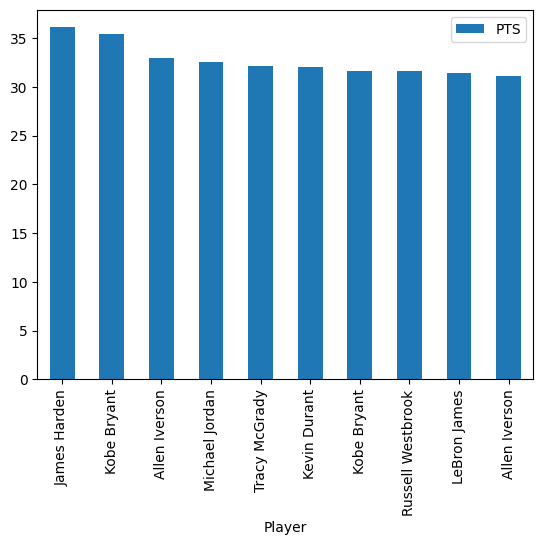

In [68]:
highest_scoring.plot.bar("Player", "PTS")

Looking at highest scoring player by year

In [69]:
highest_scoring = stats.groupby("Year").apply(lambda x: x.sort_values("PTS", ascending = False).head(1))

<Axes: xlabel='Year'>

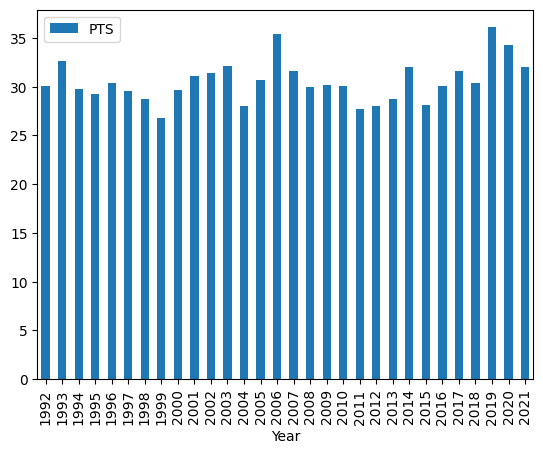

In [70]:
highest_scoring.plot.bar("Year", "PTS")

In [71]:
stats.corr()["Share"]

C:\Users\ljjx\AppData\Local\Temp\ipykernel_27892\2927041331.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  stats.corr()["Share"]


Age        0.018473
G          0.089136
GS         0.167139
MP         0.161941
FG         0.276665
FGA        0.249752
FG%        0.064915
3P         0.097332
3PA        0.097436
3P%        0.012938
2P         0.276680
2PA        0.252972
2P%        0.062115
eFG%       0.058346
FT         0.314991
FTA        0.320611
FT%        0.036761
ORB        0.100495
DRB        0.213442
TRB        0.186110
AST        0.200280
STL        0.173148
BLK        0.154072
TOV        0.233381
PF         0.070862
PTS        0.287999
Year      -0.007721
Pts Won    0.995497
Pts Max    0.522855
Share      1.000000
W          0.122144
L         -0.121379
W/L%       0.126130
GB        -0.100114
PS/G       0.045559
PA/G      -0.039330
SRS        0.122229
Name: Share, dtype: float64